In [58]:
import csv
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

In [59]:
# Load Data
file = open('data/ballPosition.csv')
x_ball = []
y_ball = []
csvreader = csv.reader(file)
i = 0
for row in csvreader:
    i += 1
    if(row != ['x;y']):
        rc = row[0]
        row = rc.split(";")
        x_ball.append(int(row[0]))
        y_ball.append(int(row[1]))


In [60]:
# Polyfit
a, b, c = np.polyfit(x_ball, y_ball, 2)

xMaximum = - b / (2*a)
yMaximum = (a * xMaximum * xMaximum + b * xMaximum + c)

In [61]:
# Determine if ball is flying left to right or right to left
leftToRight = True
if x_ball[0] > x_ball[1]:
  leftToRight = False

h0 = yMaximum           # m
hmax = h0               # keep track of the maximum height
hzero = 130             # groundlevel
h = h0
hstop = 20              # stop when bounce is less than 10

g = abs(2*a)            # m/s/s
v = 0                   # m/s, current velocity
vmax = sqrt(2 * (hmax-hzero) * g)

tzero = xMaximum          
t = tzero               # starting time
dt = 1                  # time step
t_last = tzero + -sqrt(2*(h0-hzero)/g) # time we would have launched to get to h0 at t

rho = 0.7               # coefficient of restitution
tau = -0.01              # contact time for bounce
freefall = True         # state: freefall or in contact

H = []
T = []

while(hmax > hstop):
  if(freefall):
    hnew = h + v*dt - 0.5*g*dt*dt
    if(hnew<hzero):
      t = t_last + 2*sqrt(2*hmax/g)
      freefall = False
      t_last = t + tau
      h = hzero
    else:
      t = t + dt
      v = v - g*dt
      h = hnew
  else:
    t = t + tau
    vmax = vmax * rho
    v = vmax
    freefall = True
  hmax = 0.5*vmax*vmax/g
  H.append(h)
  if leftToRight:
    T.append(t)
  else:
    T.append(-t+ tzero * 2)

print("stopped bouncing at t=%.3f\n"%(t))

# calculate polynomial regression
x_poly = []
y_poly = []

for i in range(500, 1350):
  x_poly.append(i)
  y_poly.append(a * i*i + b* i+ c)

stopped bouncing at t=2673.259



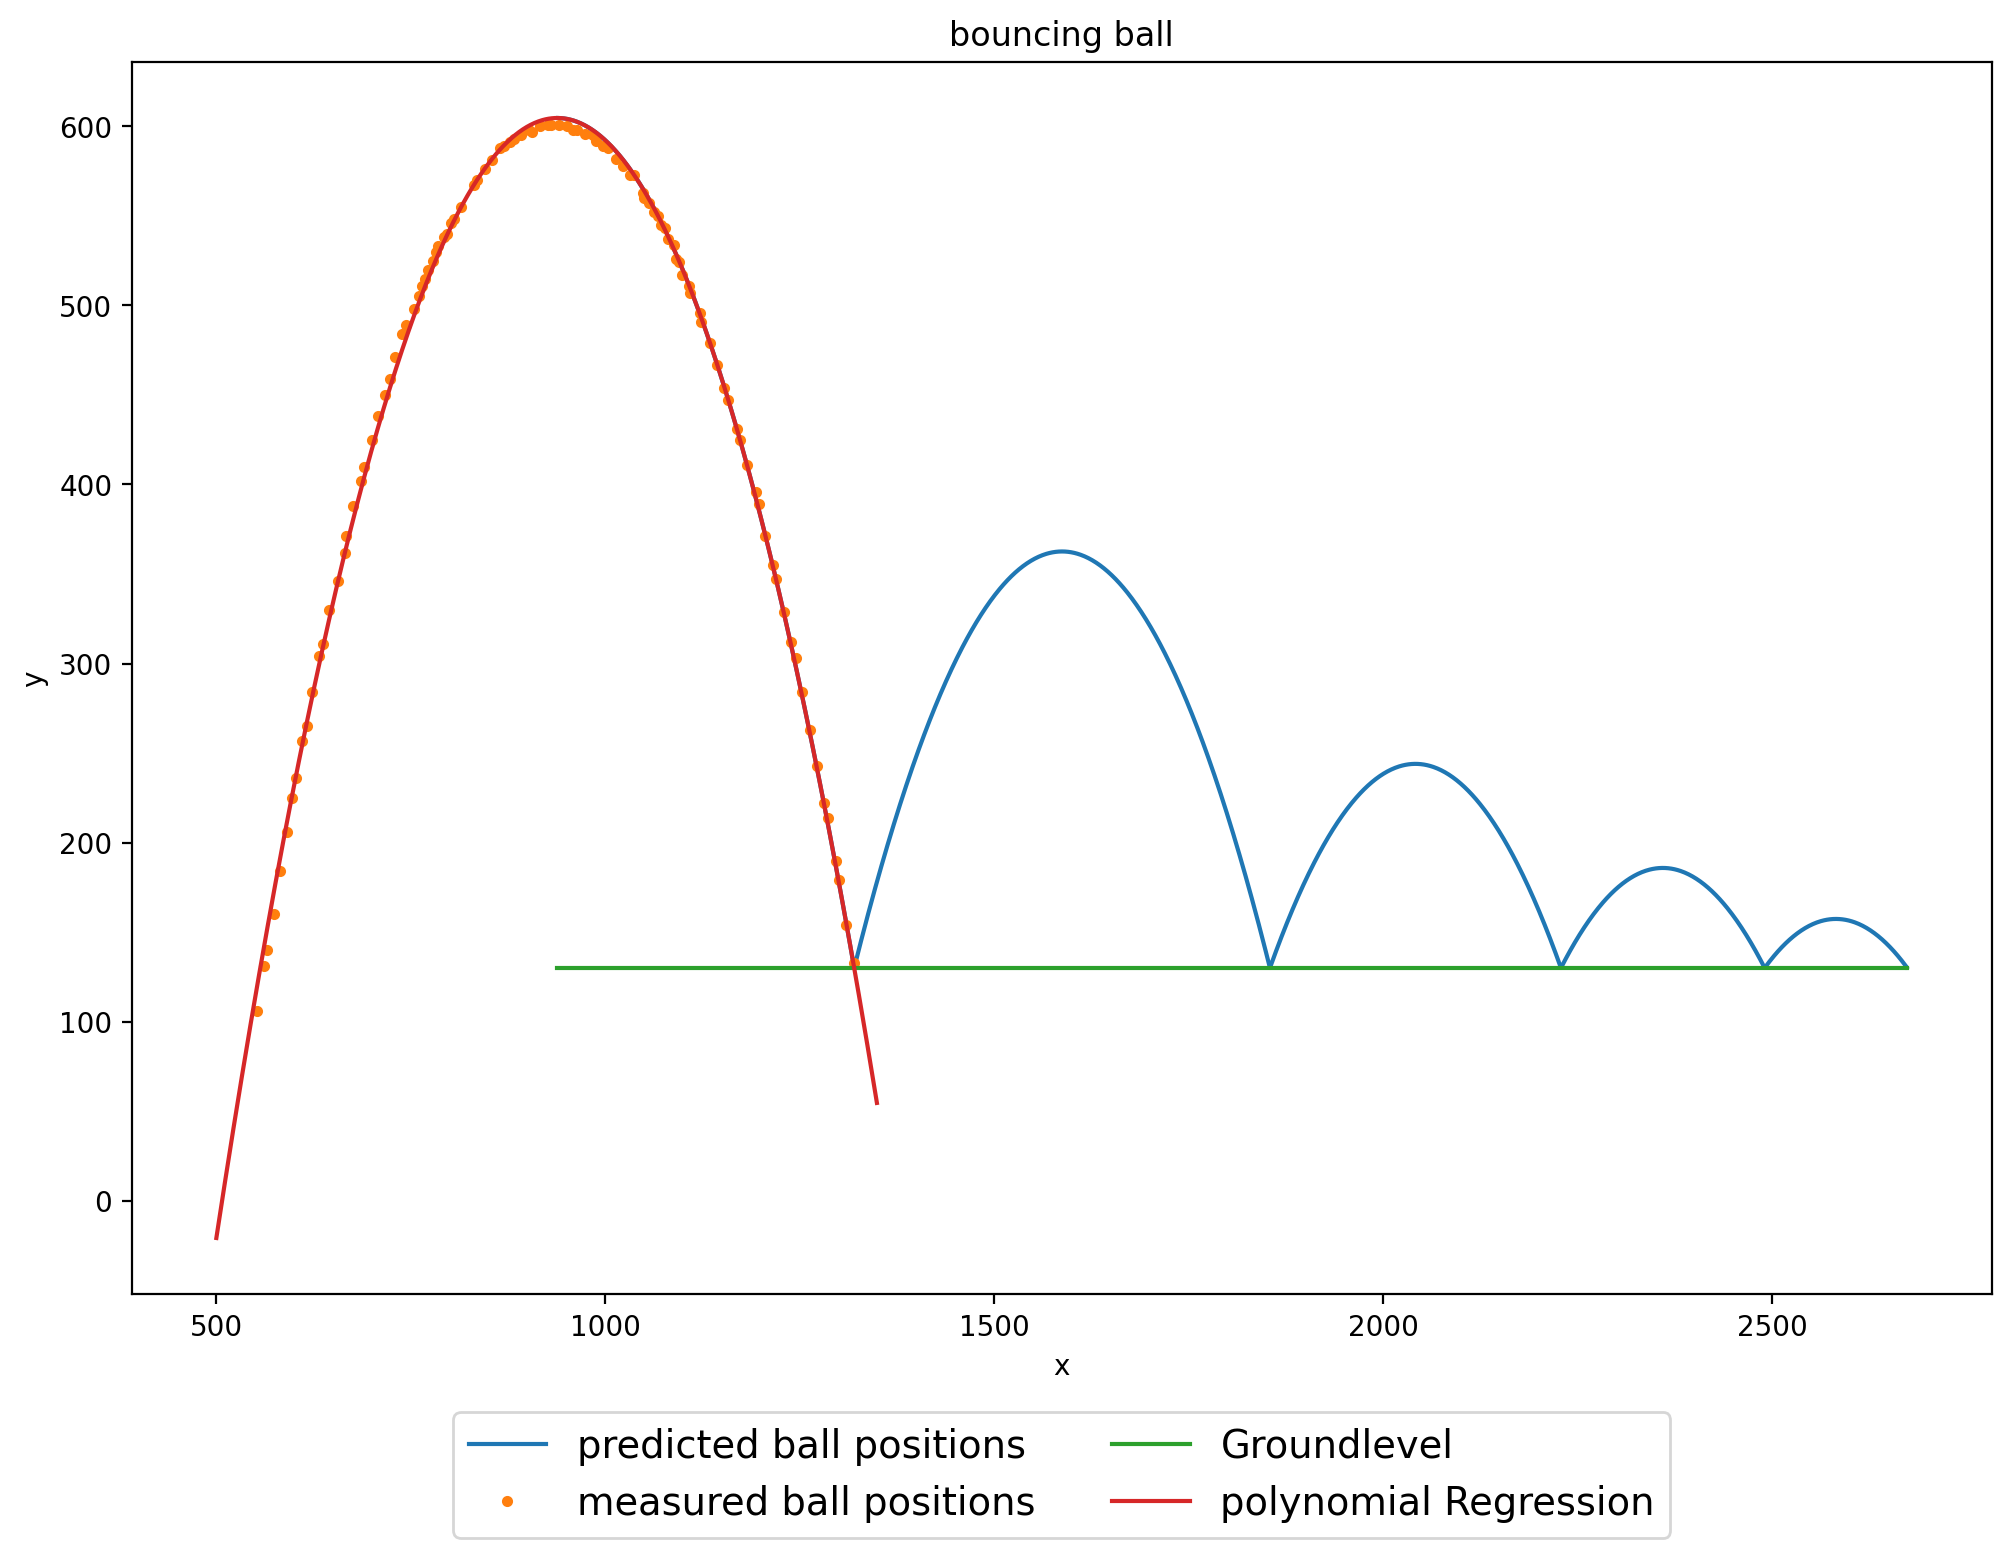

In [62]:
# Plot Results

plt.figure()
plt.plot(T, H, label = "predicted ball positions")
plt.plot(x_ball, y_ball, '.', label = "measured ball positions")
plt.plot((tzero,t), (hzero, hzero), label = "Groundlevel")
plt.plot(x_poly, y_poly, label = "polynomial Regression")
plt.xlabel('x')
plt.ylabel('y')
plt.title('bouncing ball')

plt.rcParams['figure.dpi'] = 200
plt.legend(loc='upper center', prop={'size':13.89}, 
           bbox_to_anchor=(0.5, -0.08), ncol=2)
plt.rcParams['figure.figsize'] = [12, 8]